In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; 
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from datetime import date


In [2]:
# Load data
accidents = pd.read_csv('dft-road-casualty-statistics-accident-2020.csv')
accidents.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [4]:
accidents.accident_year.unique()

array([2020])

In [5]:
accidents.drop(['accident_index', 'accident_year', 'accident_reference'], axis = 1, inplace = True)

In [6]:
accidents.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,...,9,1,9,9,0,0,1,3,2,E01004576
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,...,4,1,1,1,0,0,1,1,2,E01003034
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,...,0,4,1,2,0,0,1,1,2,E01004726
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,...,4,4,1,1,0,0,1,1,2,E01003617
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,...,0,4,1,1,0,0,1,1,2,E01004763


In [10]:
accidents[accidents.isnull().any(axis=1)]

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,NaN,NaN,NaN,NaN,5,2,2,1,26/11/2020,5,...,0,1,1,1,0,0,3,1,2,-1
29452,NaN,NaN,NaN,NaN,7,3,2,1,19/12/2020,7,...,0,1,1,1,0,0,3,1,2,-1
32689,NaN,NaN,NaN,NaN,12,3,2,2,30/09/2020,4,...,0,1,2,2,0,0,3,1,2,-1
33578,NaN,NaN,NaN,NaN,13,3,2,1,03/03/2020,3,...,0,1,1,1,0,0,3,1,1,-1
81252,NaN,NaN,NaN,NaN,52,3,3,2,29/05/2020,6,...,0,7,1,1,0,0,3,1,2,-1
86437,NaN,NaN,NaN,NaN,62,3,2,1,13/11/2020,6,...,5,4,1,1,0,0,3,1,-1,-1
86642,NaN,NaN,NaN,NaN,63,3,2,1,26/02/2020,4,...,0,1,9,-1,0,0,3,2,-1,-1
86651,NaN,NaN,NaN,NaN,63,3,2,1,27/02/2020,5,...,0,1,9,1,0,0,3,2,-1,-1
86668,NaN,NaN,NaN,NaN,63,3,2,1,12/02/2020,4,...,0,1,2,2,0,0,3,2,-1,-1
86705,NaN,NaN,NaN,NaN,63,3,1,1,10/06/2020,4,...,0,1,1,1,0,0,3,2,-1,-1


In [7]:
accidents.isnull().values.any()

True

In [8]:
accidents.isnull().sum()

location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0
speed_limit                                     0
junction_detail                                 0
junction_control                                0


In [9]:
accidents.shape

(91199, 33)

In [13]:
accidents.dtypes

location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road_number                                int64
road_type                                        int64
speed_limit                                      int64
junction_d

In [18]:
#Check if there is any duplicates
accidents.duplicated().any() 

True

In [19]:
#Check how many duplicates 
accidents.duplicated().sum() 

1

In [22]:
accidents.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Length: 91199, dtype: bool

In [17]:
accidents[['date', 'day_of_week', 'time']].head()

,date,day_of_week,time
0,04/02/2020,3,09:00
1,27/04/2020,2,13:55
2,01/01/2020,4,01:25
3,01/01/2020,4,01:50
4,01/01/2020,4,02:25


In [23]:
#Add a column "major_incident"
accidents['major_incident'] = [1 if (i==1)&(j>=3) else 0 \
                               for i, j in zip(accidents['accident_severity'], \
                                               accidents['number_of_casualties'])]


In [31]:
accidents.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,major_incident
count,91185.000000,9.118500e+04,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,456487.876416,2.737645e+05,-1.189258,52.351073,27.488043,2.768232,1.835272,1.267382,4.121558,311.482812,...,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,1.415268,1.721521,0.002215
std,93512.711807,1.473516e+05,1.367786,1.327573,24.548964,0.456682,0.677272,0.681473,1.932200,253.456329,...,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.665469,0.801491,0.047011
min,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000
25%,392890.000000,1.745690e+05,-2.107789,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,63.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,465545.000000,2.085990e+05,-1.046912,51.763385,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,530168.000000,3.783660e+05,-0.125238,53.297386,45.000000,3.000000,2.000000,1.000000,6.000000,502.000000,...,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000
max,655138.000000,1.184351e+06,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,941.000000,...,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000,1.000000


In [34]:
#Create a subset of data for certain columns
accident_sub=accidents[['police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week','time','major_incident']]

In [35]:
accident_sub

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,major_incident
0,1,3,1,1,3,09:00,0
1,1,3,1,2,2,13:55,0
2,1,3,1,1,4,01:25,0
3,1,2,1,1,4,01:50,0
4,1,3,1,2,4,02:25,0
...,...,...,...,...,...,...,...
91194,99,2,2,1,4,14:30,0
91195,99,3,1,1,6,15:05,0
91196,99,2,2,1,4,12:42,0
91197,99,3,2,1,3,14:00,0


<AxesSubplot:xlabel='day_of_week', ylabel='number_of_casualties'>

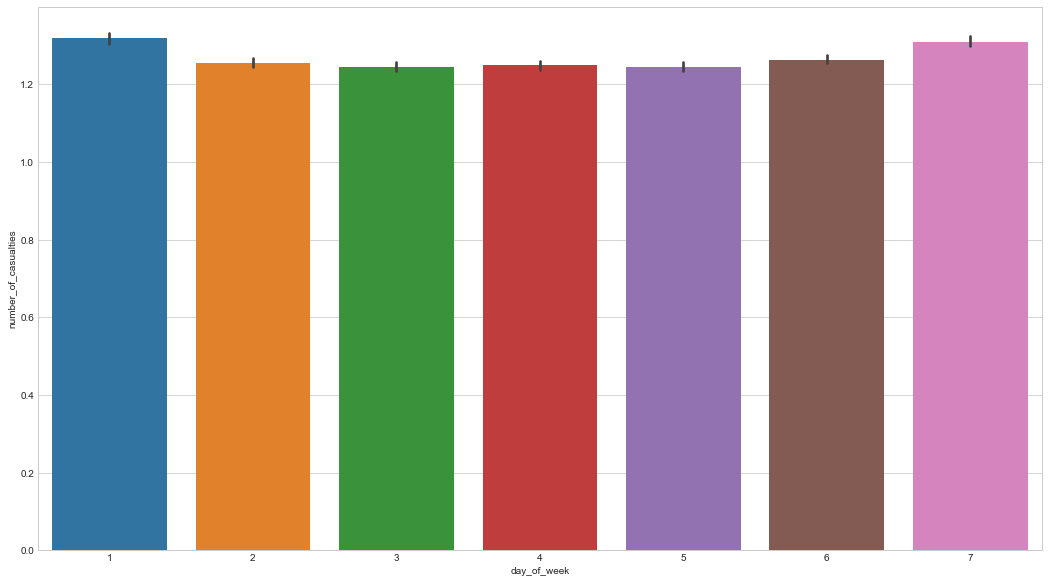

In [47]:
#Plot the graph
# Set the width and height of the figure
plt.figure(figsize=(18,10))

#Bar Chart showing number of casualties on different day of the week
sns.barplot(x=accident_sub['day_of_week'], y=accident_sub['number_of_casualties'])

<AxesSubplot:xlabel='day_of_week', ylabel='major_incident'>

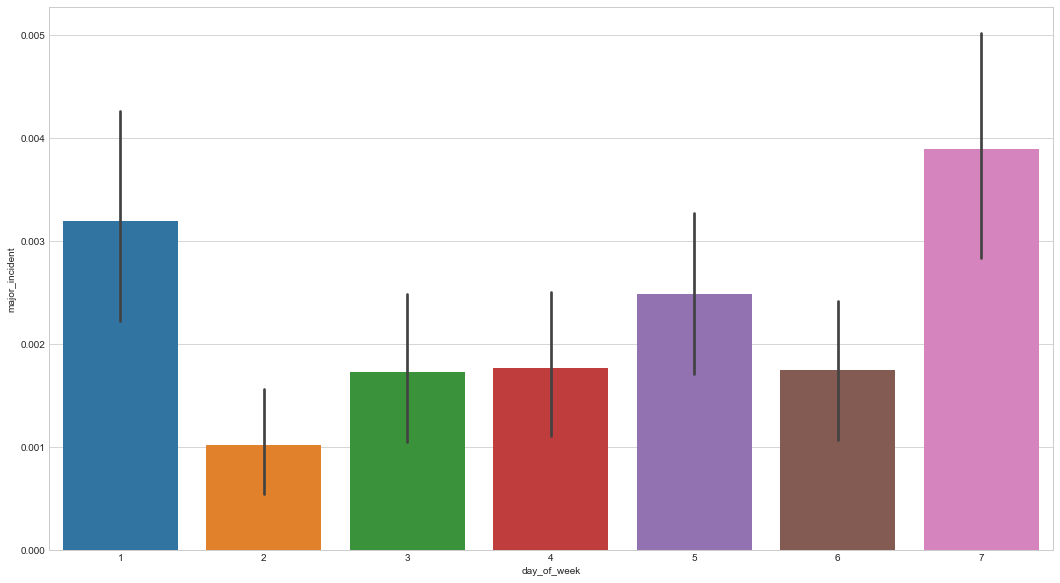

In [48]:
# Set the width and height of the figure
plt.figure(figsize=(18,10))
#Bar Chart showing number of casualties on different day of the week
sns.barplot(x=accident_sub['day_of_week'], y=accident_sub['major_incident'])